In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTEENN, SMOTETomek

sortedFeatureCorr = pd.read_csv("dataset/corr.csv")
data = pd.read_csv("dataset/preprocessed.csv")

data = data.drop(data[data.target == -1].index)
data = data.drop(list(data.columns)[0], axis = 1)

In [2]:
target = data.target
feature = data.drop('target', axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 31)
y_test_3_class = ["Low" if x == 1 or x == 2 else "Medium" if x == 3  else 'High' for x in y_test]
y_train_3_class = ["Low" if i == 1 or i == 2 else "Medium" if i == 3  else 'High' for i in y_train]

print(X_train.shape)
print(y_train.shape)

(609675, 42)
(609675,)


In [4]:
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.linear_model import SGDClassifier

# ignore all future warnings
simplefilter(action = 'ignore', category = FutureWarning)

'sc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

### Train the model with re-sampling (5 - classes)

In [5]:
sm = SMOTEENN(random_state = 27, n_jobs = -1)

X_train_sampled_5_class, y_train_sampled_5_class = sm.fit_sample(X_train, y_train)

In [6]:
print(X_train_sampled_5_class.shape)

(313705, 42)


In [7]:
feature_map_rbf = RBFSampler(gamma = 0.0001, random_state = 1, n_components = 40)
X_Train_mapped_5_class = feature_map_rbf.fit_transform(X_train_sampled_5_class)
clf = SGDClassifier(penalty = "elasticnet", loss = "modified_huber", n_jobs = -1, 
                    n_iter_no_change = 500, class_weight = "balanced")

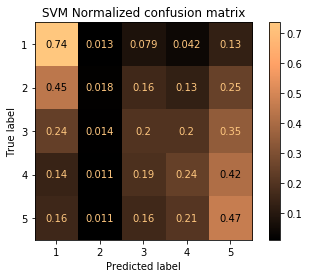

---------Performance Score--------------

 Micro F1: 0.3427459831123416

 Precision: 0.3427459831123416

 Recall: 0.3427459831123416

 Accuracy: 0.3427459831123416



In [8]:
clf.fit(X_Train_mapped_5_class, y_train_sampled_5_class)

X_Test_mapped_5_class = feature_map_rbf.fit_transform(X_test)
y_pred = clf.predict(X_Test_mapped_5_class)

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "SVM Normalized confusion matrix"
disp = plot_confusion_matrix(clf, X_Test_mapped_5_class, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

# See the result of the model with Test Set

print('---------Performance Score--------------')
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
precision= precision_score(y_true = y_test, y_pred = y_pred, average = 'micro')
recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'micro')
micro_f1 = f1_score(y_true = y_test, y_pred = y_pred, average = 'micro')

print('\n Micro F1: {}'.format(micro_f1))
print('\n Precision: {}'.format(precision))
print('\n Recall: {}'.format(recall))
print('\n Accuracy: {}\n'.format(accuracy))

### Train the model with re-sampling (3 - classes)

In [9]:
sm = SMOTEENN(random_state = 27, n_jobs = -1)

X_train_sampled_3_class, y_train_sampled_3_class = sm.fit_sample(X_train, y_train_3_class)

In [10]:
print(X_train_sampled_3_class.shape)

(489971, 42)


In [11]:
feature_map_rbf = RBFSampler(gamma = 0.0001, random_state = 1, n_components = 40)
X_Train_mapped_3_class = feature_map_rbf.fit_transform(X_train_sampled_3_class)
clf = SGDClassifier(penalty = "elasticnet", loss = "modified_huber", n_jobs = -1, 
                    n_iter_no_change = 500, class_weight = "balanced")

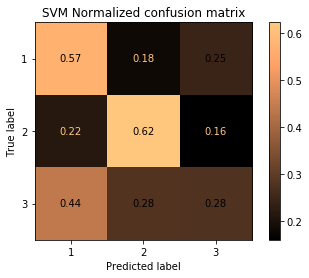

---------Performance Score--------------

 Micro F1: 0.529704301957105

 Precision: 0.529704301957105

 Recall: 0.529704301957105

 Accuracy: 0.529704301957105



In [12]:
clf.fit(X_Train_mapped_3_class, y_train_sampled_3_class)

X_Test_mapped_3_class = feature_map_rbf.fit_transform(X_test)
y_pred = clf.predict(X_Test_mapped_3_class)

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "SVM Normalized confusion matrix"
disp = plot_confusion_matrix(clf, X_Test_mapped_3_class, y_test_3_class, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

# See the result of the model with Test Set

print('---------Performance Score--------------')
accuracy = accuracy_score(y_true = y_test_3_class, y_pred = y_pred)
precision= precision_score(y_true = y_test_3_class, y_pred = y_pred, average = 'micro')
recall = recall_score(y_true = y_test_3_class, y_pred = y_pred, average = 'micro')
micro_f1 = f1_score(y_true = y_test_3_class, y_pred = y_pred, average = 'micro')

print('\n Micro F1: {}'.format(micro_f1))
print('\n Precision: {}'.format(precision))
print('\n Recall: {}'.format(recall))
print('\n Accuracy: {}\n'.format(accuracy))
